In [19]:
import numpy as np
import Exact_search_methods as esm
import matplotlib.pyplot as plt

file_path = '../dataset/Github/tiny.csv'
coordinates = esm.get_coordinates_kaggle(file_path)
dist_matrix = esm.get_distance_matrix(coordinates)

print("Number of cities:", len(dist_matrix))

Number of cities: 10


In [20]:
o1, p1, t1 = esm.Brute_Force(dist_matrix)
print("Method: Brute_Force, ", "Time: ", t1, ", Path Distance: ", o1)

Method: Brute_Force,  Time:  0.9265964031219482 , Path Distance:  12.516978039789695


In [21]:
o2, p2, t2 = esm.Held_Karp(dist_matrix)
print("Method: Held Karp, ", "Time: ", t2, ", Path Distance: ", o2)

Method: Held Karp,  Time:  0.0041921138763427734 , Path Distance:  12.516978039789695


In [22]:
o3, p3, t3 = esm.Linear_Programming(dist_matrix)
print("Method: Linear Programming, ", "Time: ", t3, ", Path Distance: ", o3)

Method: Linear Programming,  Time:  0.12419962882995605 , Path Distance:  12.516978039789695


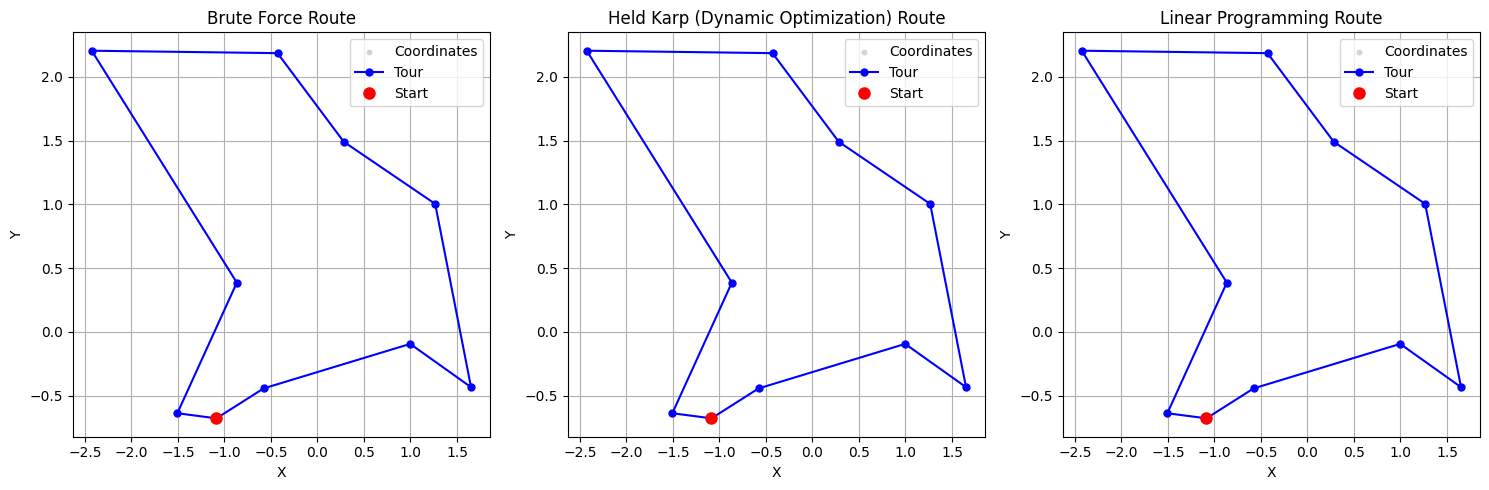

In [23]:
def plot_route(ax, route, coordinates, method_name):
    coordinates = np.array(coordinates)
    x = coordinates[:, 0]
    y = coordinates[:, 1]
    route = np.array(route, dtype=int)

    # Plot the coordinates in a light color for clarity
    ax.scatter(x, y, color='lightgray', s=10, label="Coordinates")
    
    # Plot the route with a distinct color (e.g., blue) and a larger line width
    ax.plot(x[route], y[route], '-o', color='blue', label='Tour', markersize=5)
    
    # Highlight the start point with a different color (e.g., red)
    ax.plot(x[route[0]], y[route[0]], 'ro', markersize=8, label="Start")
    
    ax.set_title(f"{method_name} Route") 
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 4 columns

# Use the plot_route function for each subplot, passing the axes
plot_route(axs[0], p1, coordinates, "Brute Force")
plot_route(axs[1], p2, coordinates, "Held Karp (Dynamic Optimization)")
plot_route(axs[2], p3, coordinates, "Linear Programming")

# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
import random
import csv

file_path = '../dataset/Github/small.csv'
coordinates = esm.get_coordinates_kaggle(file_path)

o_list = []
t_list = []
n_values = []

for n in range(5, 12, 1):
    random.seed(42)
    indices = random.sample(range(len(coordinates)), n)
    selected_coordinates = coordinates[indices]
    
    # Compute the distance matrix for the selected coordinates
    dist_matrix = esm.get_distance_matrix(selected_coordinates)
    
    # Perform nearest neighbor analysis
    o1, p1, t1 = esm.Brute_Force(dist_matrix)
    o3, p3, t3 = esm.Linear_Programming(dist_matrix)

    # indices = random.sample(range(len(coordinates)), n+2)
    # selected_coordinates = coordinates[indices]
    # dist_matrix = esm.get_distance_matrix(selected_coordinates)
    o2, p2, t2 = esm.Held_Karp(dist_matrix)

    o_list.append([o1, o2, o3])
    t_list.append([t1, t2, t3])
    n_values.append(n)


o_array = np.array(o_list)
t_array = np.array(t_list)
n_array = np.array(n_values).reshape(-1, 1)
result_array = np.hstack([n_array, o_array, t_array])

save_path = '../results/exact_t_and_o.csv'
header = ['n', 'o_Brute_Force', 'o_Held_Karp', 'o_Linear_Programming',  
          't_Brute_Force', 't_Held_Karp', 't_Linear_Programming']

with open(save_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header) 
    writer.writerows(result_array)

print(f"Results saved to {save_path}")

Results saved to ../results/exact_t_and_o.csv


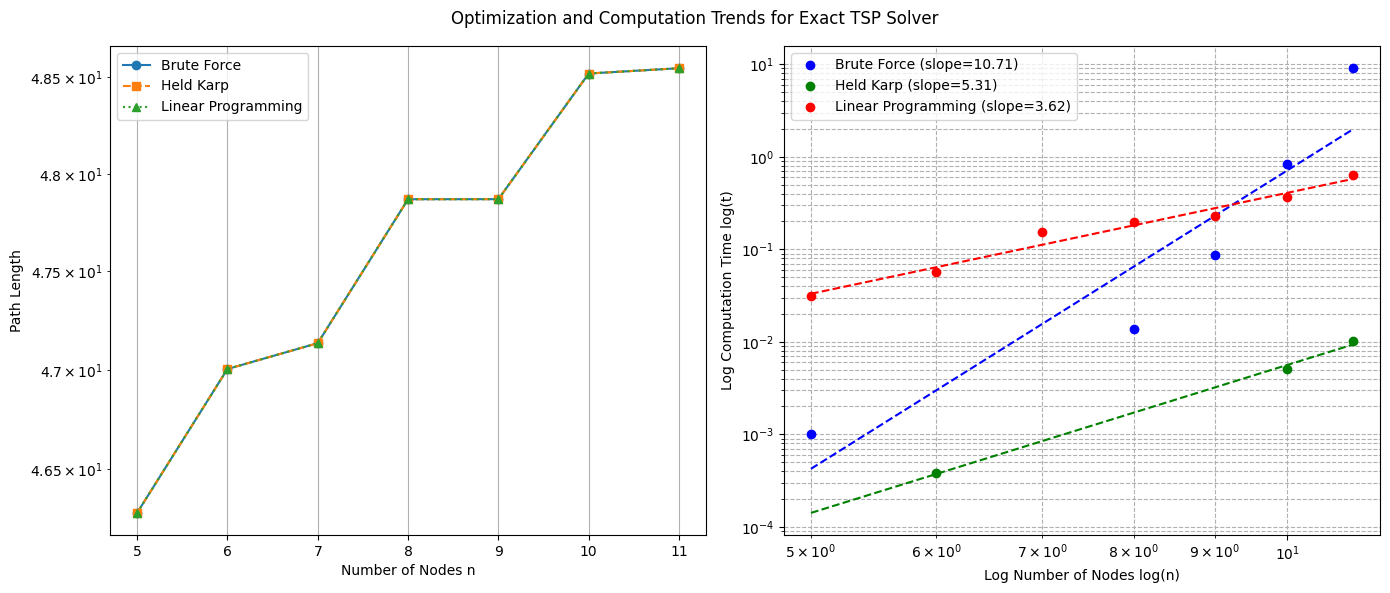

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress 

df_result = pd.read_csv("../results/exact_t_and_o.csv")

n_values = df_result['n'].to_numpy()
o_array = df_result[['o_Brute_Force', 'o_Held_Karp', 'o_Linear_Programming']].to_numpy()
t_array = df_result[['t_Brute_Force', 't_Held_Karp', 't_Linear_Programming']].to_numpy()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Optimization and Computation Trends for Exact TSP Solver')

markers = ['o', 's', '^']
linestyles = ['-', '--', ':']
for i, label in enumerate(["Brute Force", "Held Karp", "Linear Programming"]):
    ax[0].semilogy(n_values, o_array[:, i],
                   marker=markers[i],
                   linestyle=linestyles[i],
                   label=label)
ax[0].set_xlabel('Number of Nodes n')
ax[0].set_ylabel('Path Length')
ax[0].legend()
ax[0].grid(True)

# Plot for "t" values (log-log plot + fit line)
colors = ['b', 'g', 'r']
for i, label in enumerate(["Brute Force", "Held Karp", "Linear Programming"]):
    mask = t_array[:, i] > 0
    filtered_n = n_values[mask]
    filtered_t = t_array[:, i][mask]

    log_n = np.log10(filtered_n)
    log_t = np.log10(filtered_t)

    slope, intercept, r_value, p_value, std_err = linregress(log_n, log_t)

    ax[1].plot(n_values, t_array[:, i], marker='o', linestyle='', color=colors[i],
               label=f"{label} (slope={slope:.2f})")
    
    fit_line = 10**intercept * n_values**slope
    ax[1].plot(n_values, fit_line, linestyle='--', color=colors[i])

ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('Log Number of Nodes log(n)')
ax[1].set_ylabel('Log Computation Time log(t)')
ax[1].legend()
ax[1].grid(True, which='both', ls='--')

plt.tight_layout()
plt.show()

In [26]:
print(t_list[2:-1])

[[0.0, 0.005514860153198242, 0.16429519653320312], [0.010517358779907227, 0.005702972412109375, 0.18961453437805176], [0.08217787742614746, 0.01512598991394043, 0.22472906112670898], [0.8403806686401367, 0.03316974639892578, 0.3528289794921875]]
